In [1]:
import yaml
import torch
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from pathlib import Path
from ese.experiment.analysis.analysis_utils.inference_utils import preload_calibration_metrics

code_root = Path("/storage/vbutoi/projects/ESE")
scratch_root = Path("/storage/vbutoi/scratch/ESE/inference/02_19_24_WMH_SmoothNectar")

torch.set_printoptions(sci_mode=False, precision=3)
# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

/local/vbutoi/envs/UniverSegTF/lib/python3.9/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_outputs" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
%%yaml cal_cfg 

global_calibration:
    num_prob_bins: 15
    num_classes: 2
    neighborhood_width: 3
    square_diff: False 

<IPython.core.display.Javascript object>

In [3]:
# Load the inference cfg from local.
##################################################
inf_cfg_root = code_root / "ese" / "experiment" / "configs" / "inference"
##################################################
with open(inf_cfg_root / "Debug_Metrics.yaml", 'r') as file:
    cal_metrics_cfg = yaml.safe_load(file)

cal_metrics_cfg["global_cal_metrics"] = preload_calibration_metrics(
    base_cal_cfg=cal_cfg["global_calibration"],
    cal_metrics_dict=cal_metrics_cfg["global_cal_metrics"]
)

## Pick the product of the probs. 

In [4]:
import pickle 

def load_pkl(f_name):
    with open(f_name, 'rb') as f:
       return pickle.load(f)

In [5]:
ind_tl_uncalibrated_dir = scratch_root / "WMH_Individual_Uncalibrated" / "20240219_104110-WJRG-edd491052db5c8a6e51df561e715e271" / "tl_pixel_meter_dict.pkl"
ind_tl_nectar_scaling_dir = scratch_root / "WMH_Individual_NectarScaling" / "20240218_111136-SAL0-ee42c17246fe42ced961b717f000d4a9" / "tl_pixel_meter_dict.pkl"
ind_tl_hard_nectar_binning_dir = scratch_root / "WMH_Individual_NectarBinning" / "20240219_123236-QKA7-11bdebd0a8159f669a5aa7cac80ca92f" / "tl_pixel_meter_dict.pkl"
ind_tl_soft_nectar_binning_dir = scratch_root / "WMH_Individual_SoftNectarBinning" / "20240219_123301-3E9G-70144130c84b525b784f83f67e37b067"/ "tl_pixel_meter_dict.pkl" 

ind_classwise_uncalibrated_dir = scratch_root / "WMH_Individual_Uncalibrated" / "20240219_104110-WJRG-edd491052db5c8a6e51df561e715e271" / "cw_pixel_meter_dict.pkl"
ind_classwise_nectar_scaling_dir = scratch_root / "WMH_Individual_NectarScaling" / "20240218_111136-SAL0-ee42c17246fe42ced961b717f000d4a9" / "cw_pixel_meter_dict.pkl"
ind_classwise_hard_nectar_binning_dir = scratch_root / "WMH_Individual_NectarBinning" / "20240219_123236-QKA7-11bdebd0a8159f669a5aa7cac80ca92f" / "cw_pixel_meter_dict.pkl"
ind_classwise_soft_nectar_binning_dir = scratch_root / "WMH_Individual_SoftNectarBinning" / "20240219_123301-3E9G-70144130c84b525b784f83f67e37b067"/ "cw_pixel_meter_dict.pkl" 

In [6]:
ind_calibrator_dict = {
    "Uncalibrated": {
        "top_label": load_pkl(ind_tl_uncalibrated_dir),
        "classwise": load_pkl(ind_classwise_uncalibrated_dir)
    },
    "NectarScaling": {
        "top_label": load_pkl(ind_tl_nectar_scaling_dir),
        "classwise": load_pkl(ind_classwise_nectar_scaling_dir)
    },
    "HardNectarBinning": {
        "top_label": load_pkl(ind_tl_hard_nectar_binning_dir),
        "classwise": load_pkl(ind_classwise_hard_nectar_binning_dir)
    },
    "SoftNectarBinning": {
        "top_label": load_pkl(ind_tl_soft_nectar_binning_dir),
        "classwise": load_pkl(ind_classwise_soft_nectar_binning_dir)
    },
}

In [7]:
# # Let's build a dataframe to store the calibration metrics.
# rows = []
# # Loop through the calibration metrics and add them to the dataframe.
# for cal_metric_name, cal_metric_dict in cal_metrics_cfg["global_cal_metrics"].items():
#     for calibrator in ind_calibrator_dict:
#         for split in ["cal"]:
#             cal_type = cal_metric_dict['cal_type']
#             if cal_type in ["classwise", "toplabel"]:
#                 print(f"CALIBRATOR:{calibrator}")
#                 if cal_type == 'classwise':
#                     cal_info = cal_metric_dict['_fn'](
#                         pixel_meters_dict=ind_calibrator_dict[calibrator]["classwise"][split],
#                         return_dict=True
#                     )
#                 else:
#                     cal_info = cal_metric_dict['_fn'](
#                         pixel_meters_dict=ind_calibrator_dict[calibrator]["top_label"][split],
#                         return_dict=True
#                     )
                
#                 print(f"Global Bin counts: (Total: {cal_info['bin_amounts'].sum()})")
#                 print(cal_info["bin_amounts"])
#                 print()
#                 print("Global Freqs:")
#                 print(cal_info["bin_freqs"])
#                 print()
#                 print("Global Confs:")
#                 print(cal_info["bin_confs"])
#                 print()
#                 print("Global Bin cal errors:")
#                 print(cal_info["bin_cal_errors"])
#                 print()
#                 print("SPLIT:{} | CALIBRATION METRIC:{} | LOSS:{}".format(
#                     split, cal_metric_name, cal_info['cal_error']
#                 ))
#                 print()
#                 print()
#             else:
#                 raise ValueError(f"Calibration type {cal_metric_dict['cal_type']} not recognized.")

## Looking at the Ensemble Methods.

In [8]:
ens_tl_uncalibrated_dir = scratch_root / "WMH_Ensemble_Uncalibrated" / "20240219_104201-BKCC-a7f56d80c4bf65f817a1cb4dc10d85b2" / "tl_pixel_meter_dict.pkl"
ens_tl_nectar_scaling_dir = scratch_root / "WMH_Ensemble_NectarScaling" / "20240218_111255-UBCH-995007dddba34d84eb7ae0aa6406373c" / "tl_pixel_meter_dict.pkl"
ens_tl_hard_nectar_binning_dir = scratch_root / "WMH_Ensemble_NectarBinning" / "20240219_123424-J8FG-669764637a558a02fa9f296ad0470121" / "tl_pixel_meter_dict.pkl"
ens_tl_soft_nectar_binning_dir = scratch_root / "WMH_Ensemble_SoftNectarBinning" / "20240219_123443-KR38-006b299497cfbed50526e828ad1d123a"/ "tl_pixel_meter_dict.pkl" 

ens_classwise_uncalibrated_dir = scratch_root / "WMH_Ensemble_Uncalibrated" / "20240219_104201-BKCC-a7f56d80c4bf65f817a1cb4dc10d85b2" / "cw_pixel_meter_dict.pkl"
ens_classwise_nectar_scaling_dir = scratch_root / "WMH_Ensemble_NectarScaling" / "20240218_111255-UBCH-995007dddba34d84eb7ae0aa6406373c" / "cw_pixel_meter_dict.pkl"
ens_classwise_hard_nectar_binning_dir = scratch_root / "WMH_Ensemble_NectarBinning" / "20240219_123424-J8FG-669764637a558a02fa9f296ad0470121" / "cw_pixel_meter_dict.pkl"
ens_classwise_soft_nectar_binning_dir = scratch_root / "WMH_Ensemble_SoftNectarBinning" / "20240219_123443-KR38-006b299497cfbed50526e828ad1d123a"/ "cw_pixel_meter_dict.pkl" 

In [9]:
ensemble_calibrator_dict = {
    "Uncalibrated": {
        "top_label": load_pkl(ens_tl_uncalibrated_dir),
        "classwise": load_pkl(ens_classwise_uncalibrated_dir)
    },
    "NectarScaling": {
        "top_label": load_pkl(ens_tl_nectar_scaling_dir),
        "classwise": load_pkl(ens_classwise_nectar_scaling_dir)
    },
    "HardNectarBinning": {
        "top_label": load_pkl(ens_tl_hard_nectar_binning_dir),
        "classwise": load_pkl(ens_classwise_hard_nectar_binning_dir)
    },
    "SoftNectarBinning": {
        "top_label": load_pkl(ens_tl_soft_nectar_binning_dir),
        "classwise": load_pkl(ens_classwise_soft_nectar_binning_dir)
    },
}

In [10]:
cal_results = []
# Loop through the calibration metrics and add them to the dataframe.
for cal_metric_name, cal_metric_dict in cal_metrics_cfg["global_cal_metrics"].items():
    for calibrator in ensemble_calibrator_dict:
        for split in ["cal"]:
            cal_type = cal_metric_dict['cal_type']
            if cal_type in ["classwise", "toplabel"]:
                print(f"CALIBRATOR:{calibrator}")
                if cal_type == 'classwise':
                    cal_info = cal_metric_dict['_fn'](
                        pixel_meters_dict=ensemble_calibrator_dict[calibrator]["classwise"][split],
                        return_dict=True
                    )
                else:
                    cal_info = cal_metric_dict['_fn'](
                        pixel_meters_dict=ensemble_calibrator_dict[calibrator]["top_label"][split],
                        return_dict=True
                    )
                for bin_idx in range(cal_info['bin_amounts'].shape[0]):
                    for bin_type in ['bin_freqs', 'bin_confs', 'bin_cal_errors']:
                        cal_results.append({
                            "calibrator": calibrator,
                            "cal_metric": cal_metric_name,
                            "bin_idx": bin_idx,
                            "bin_amount": cal_info["bin_amounts"][bin_idx].item(),
                            "bin_conf": cal_info["bin_confs"][bin_idx].item(),
                            "bin_freq": cal_info["bin_freqs"][bin_idx].item(),
                            "bin_quantity": cal_info[bin_type][bin_idx].item(),
                            "bin_type": bin_type 
                        })
                print(f"Global Bin counts: (Total: {cal_info['bin_amounts'].sum()})")
                print(cal_info["bin_amounts"])
                print()
                print("Global Freqs:")
                print(cal_info["bin_freqs"])
                print()
                print("Global Confs:")
                print(cal_info["bin_confs"])
                print()
                print("Global Bin cal errors:")
                print(cal_info["bin_cal_errors"])
                print()
                print("SPLIT:{} | CALIBRATION METRIC:{} | LOSS:{}".format(
                    split, cal_metric_name, cal_info['cal_error']
                ))
                print()
                print()
            else:
                raise ValueError(f"Calibration type {cal_metric_dict['cal_type']} not recognized.")
cal_results_df = pd.DataFrame(cal_results)

CALIBRATOR:Uncalibrated
Global Bin counts: (Total: 172527.0)
tensor([10341.,  4479.,  4503.,  4504.,  4727.,  4858.,  5176.,  5512.,  5935.,
         6610.,  7482.,  8851., 10782., 16202., 72565.], dtype=torch.float64)

Global Freqs:
tensor([0.531, 0.549, 0.559, 0.556, 0.595, 0.596, 0.615, 0.639, 0.649, 0.687,
        0.692, 0.723, 0.747, 0.780, 0.857], dtype=torch.float64)

Global Confs:
tensor([0.480, 0.550, 0.584, 0.617, 0.650, 0.683, 0.717, 0.750, 0.783, 0.817,
        0.851, 0.884, 0.917, 0.951, 0.991], dtype=torch.float64)

Global Bin cal errors:
tensor([0.051, 0.001, 0.025, 0.060, 0.055, 0.088, 0.102, 0.112, 0.134, 0.130,
        0.159, 0.160, 0.171, 0.171, 0.134], dtype=torch.float64)

SPLIT:cal | CALIBRATION METRIC:Edge-ECE | LOSS:0.12381500538003261


CALIBRATOR:NectarScaling
Global Bin counts: (Total: 172527.0)
tensor([11042.,  6230.,  7012.,  8415.,  9912., 11522., 12633., 13589., 14191.,
        14443., 15296., 16757., 16591., 11381.,  3513.], dtype=torch.float64)

Global 

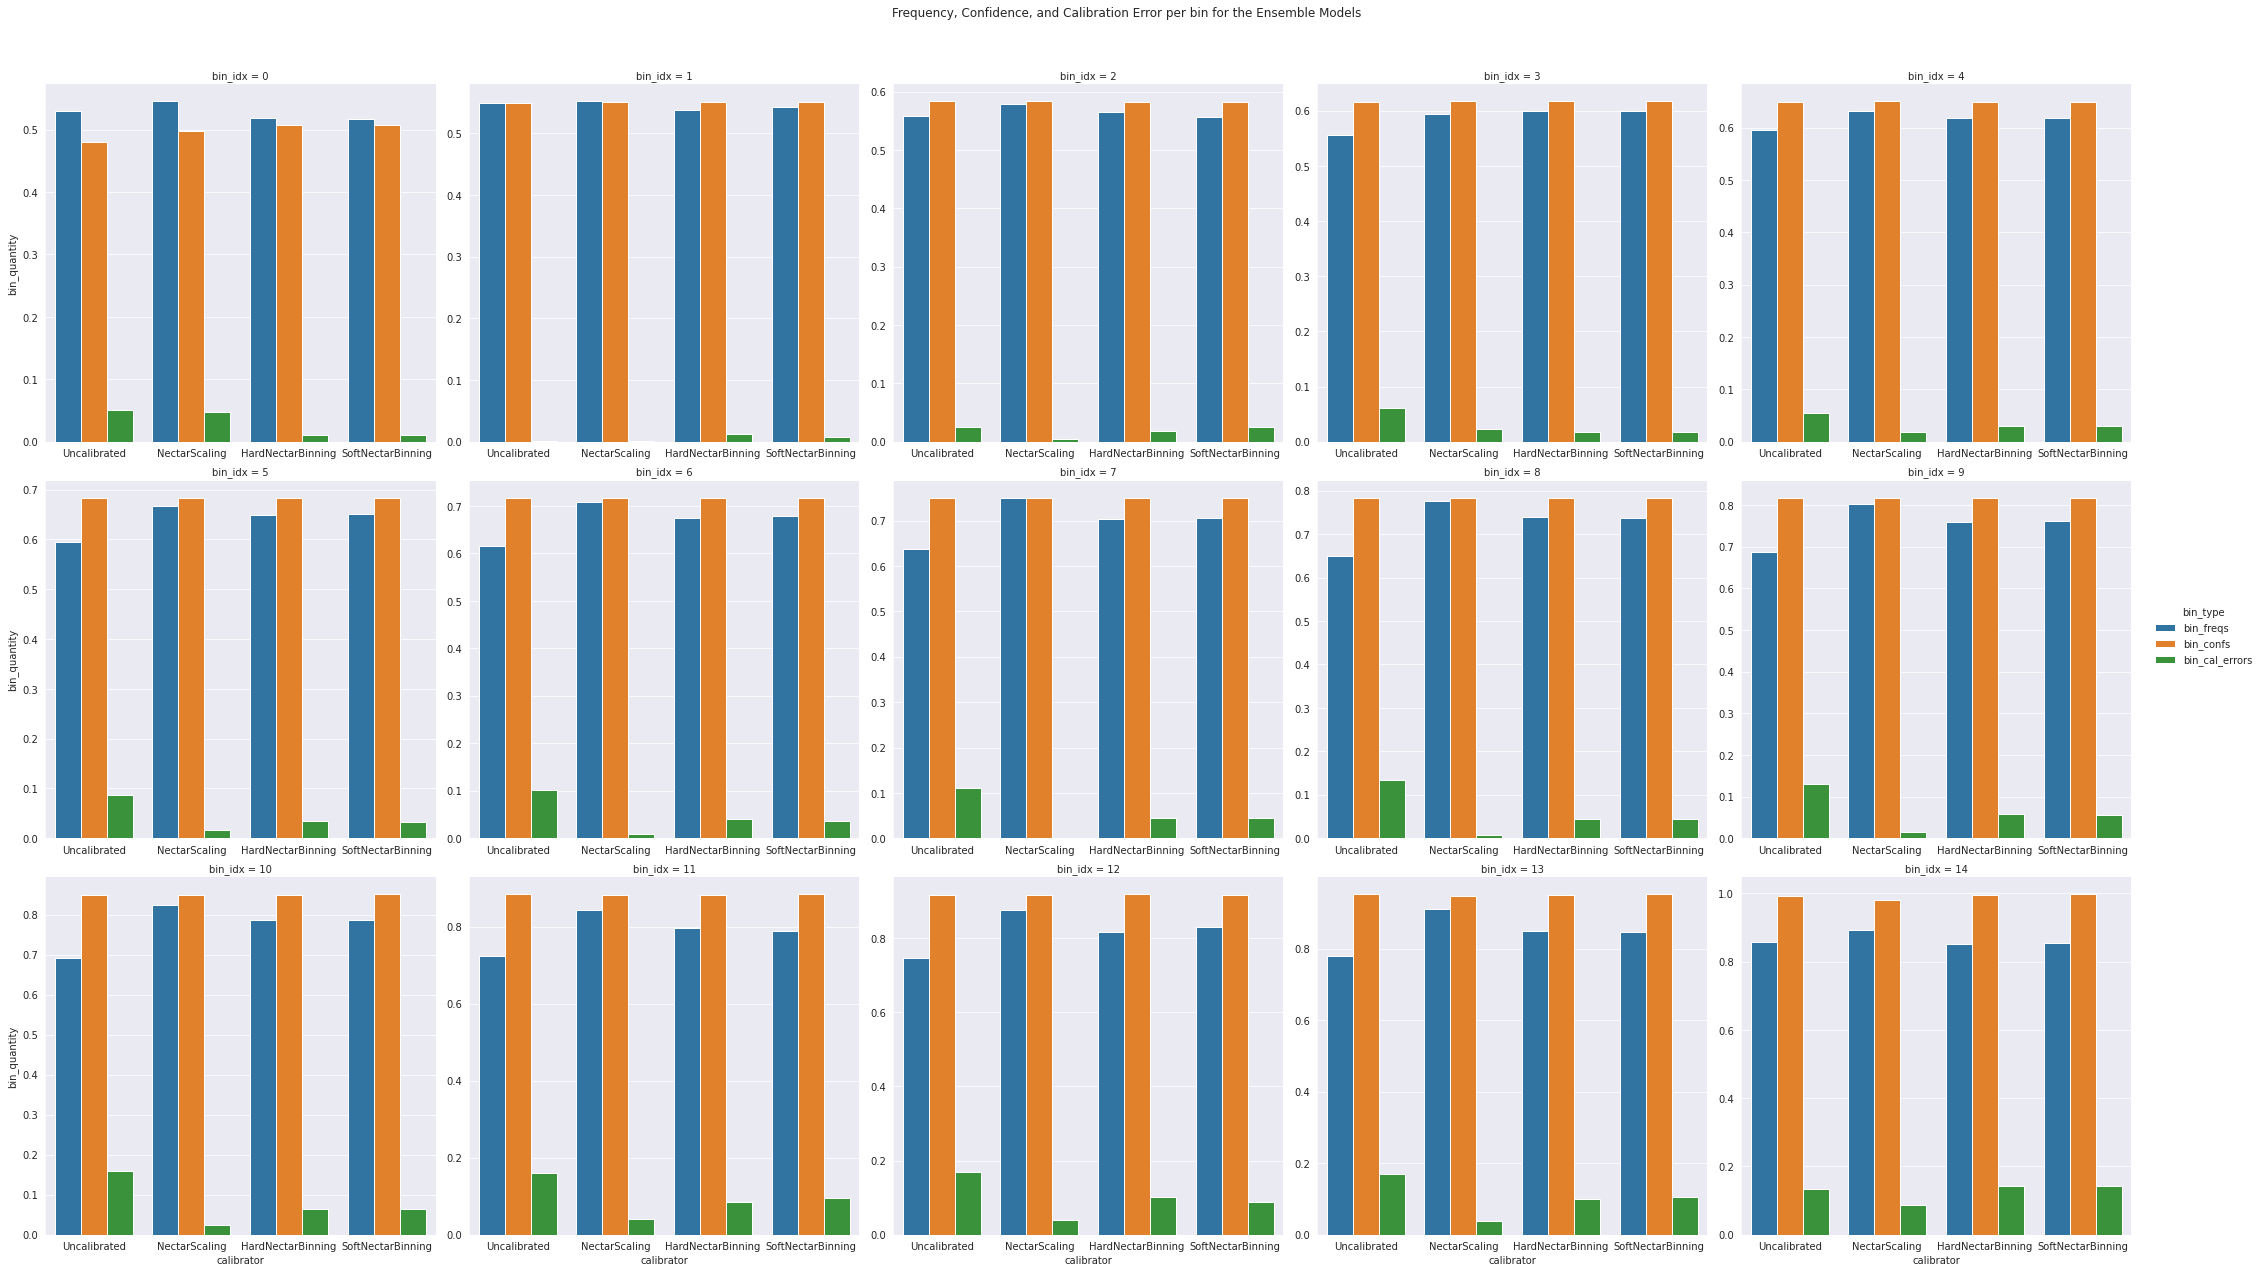

In [11]:
g = sns.catplot(
    data=cal_results_df,
    x="calibrator",
    y="bin_quantity",
    hue="bin_type",
    col="bin_idx",
    kind="bar",
    col_wrap=5,
    sharex=False,
    sharey=False,
    height=6
)
g.fig.suptitle("Frequency, Confidence, and Calibration Error per bin for the Ensemble Models")
# Move the title slightly up
g.fig.subplots_adjust(top=0.92)

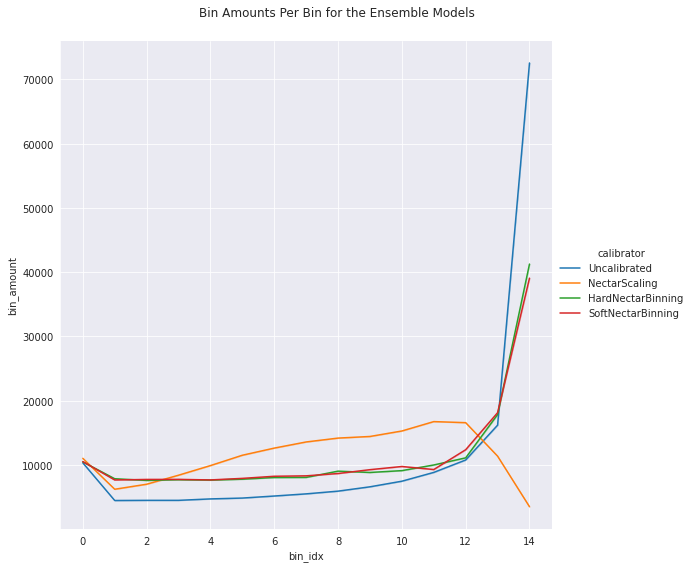

In [12]:
g = sns.relplot(
    data=cal_results_df,
    x="bin_idx",
    y="bin_amount",
    hue="calibrator",
    kind="line",
    height=8
)
g.fig.suptitle("Bin Amounts Per Bin for the Ensemble Models")
# Move the title slightly up
g.fig.subplots_adjust(top=0.92)

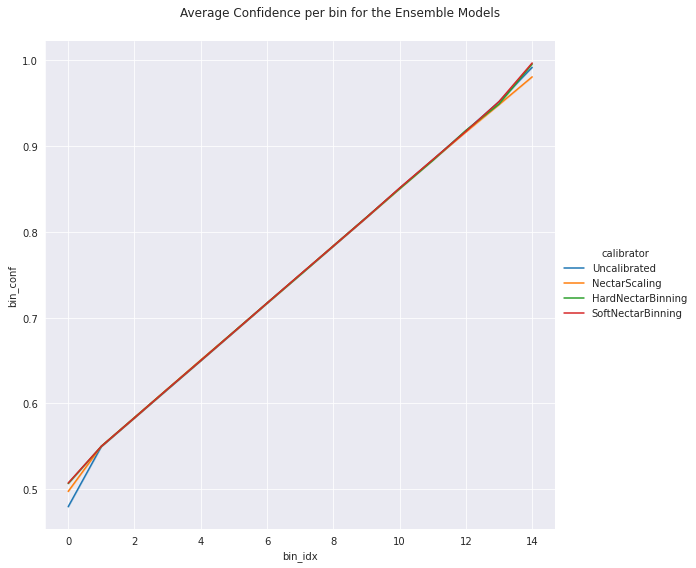

In [13]:
g = sns.relplot(
    data=cal_results_df,
    x="bin_idx",
    y="bin_conf",
    hue="calibrator",
    kind="line",
    height=8
)
g.fig.suptitle("Average Confidence per bin for the Ensemble Models")
# Move the title slightly up
g.fig.subplots_adjust(top=0.92)

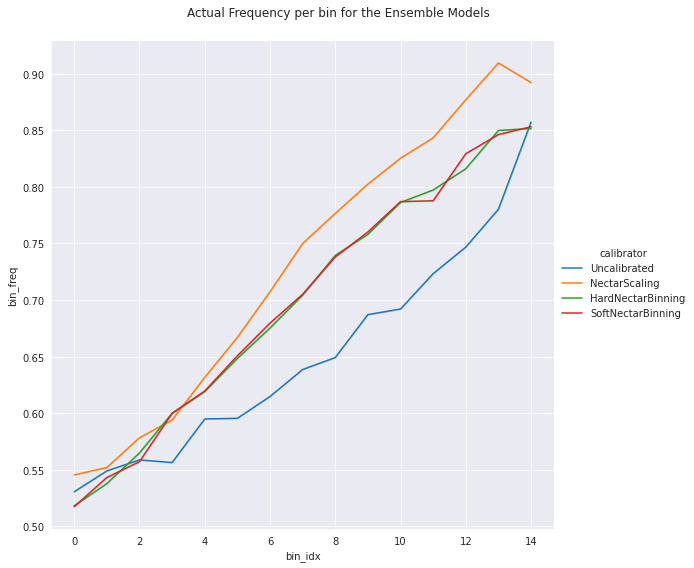

In [14]:
g = sns.relplot(
    data=cal_results_df,
    x="bin_idx",
    y="bin_freq",
    hue="calibrator",
    kind="line",
    height=8
)
g.fig.suptitle("Actual Frequency per bin for the Ensemble Models")
# Move the title slightly up
g.fig.subplots_adjust(top=0.92)

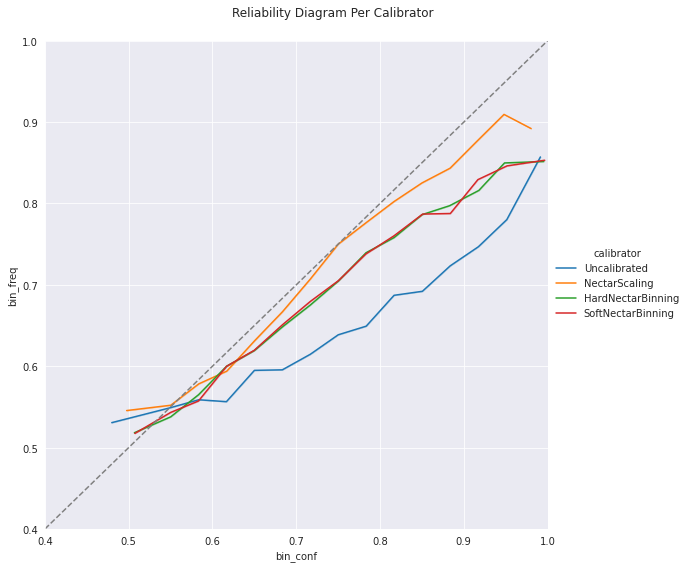

In [15]:
g = sns.relplot(
    data=cal_results_df,
    x="bin_conf",
    y="bin_freq",
    hue="calibrator",
    kind="line",
    height=8
)
# Set the y axis to be between 0.5 and 1.0
g.set(ylim=(0.4, 1.0))
g.set(xlim=(0.4, 1.0))
# Add A grey line y = x
g.ax.axline((0, 0), slope=1, color="grey", linestyle="--")

# Move the title slightly up
g.fig.suptitle("Reliability Diagram Per Calibrator")
g.fig.subplots_adjust(top=0.92)